In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2013-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800


In [6]:
data['returns'] = np.log(data.Close.pct_change() + 1)

In [10]:
def lagit(data, lags):
    names =[]
    for i in range(1,lags +1):
        data['lag_'+str(i)] = data['returns'].shift(i)
        names.append('lag_'+str(i))
    return names
    

In [12]:
lagnames = lagit(data,5)

In [13]:
lagnames

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [14]:
data

,Open,High,Low,Close,Adj Close,Volume,return,returns,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567,0.000581,0.000581,NaN,NaN,NaN,NaN,NaN
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331,0.019568,0.019568,0.000581,NaN,NaN,NaN,NaN
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239,-0.004373,-0.004373,0.019568,0.000581,NaN,NaN,NaN
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297,-0.001975,-0.001975,-0.004373,0.019568,0.000581,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100,-0.005764,-0.005764,0.002466,-0.007900,-0.014300,-0.013160,0.052035
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400,0.004793,0.004793,-0.005764,0.002466,-0.007900,-0.014300,-0.013160
2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800,0.024722,0.024722,0.004793,-0.005764,0.002466,-0.007900,-0.014300


In [16]:
data.dropna(inplace=True)

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(data[lagnames], data['return'])

LinearRegression()

In [21]:
data['prediction_LR'] = model.predict(data[lagnames])

In [22]:
data

,Open,High,Low,Close,Adj Close,Volume,return,returns,lag_1,lag_2,lag_3,lag_4,lag_5,prediction_LR
Date,,,,,,,,,,,,,,
2013-01-10,18.501402,18.555450,18.269024,18.467777,18.467777,73703226,0.004542,0.004542,0.006552,-0.001975,-0.004373,0.019568,0.000581,0.000120
2013-01-11,18.480730,18.491440,18.338762,18.430668,18.430668,51600690,-0.002011,-0.002011,0.004542,0.006552,-0.001975,-0.004373,0.019568,0.000388
2013-01-14,18.356195,18.485710,17.991314,18.013729,18.013729,114985384,-0.022882,-0.022882,-0.002011,0.004542,0.006552,-0.001975,-0.004373,0.000857
2013-01-15,17.916096,18.306383,17.736021,18.055573,18.055573,157696879,0.002320,0.002320,-0.022882,-0.002011,0.004542,0.006552,-0.001975,0.001746
2013-01-16,17.992559,18.040878,17.775124,17.812983,17.812983,81239368,-0.013527,-0.013527,0.002320,-0.022882,-0.002011,0.004542,0.006552,0.000770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100,-0.005764,-0.005764,0.002466,-0.007900,-0.014300,-0.013160,0.052035,0.000616
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400,0.004793,0.004793,-0.005764,0.002466,-0.007900,-0.014300,-0.013160,0.001790
2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800,0.024722,0.024722,0.004793,-0.005764,0.002466,-0.007900,-0.014300,0.001002


In [23]:
data['direction_LR'] = [1 if i > 0 else -1 for i in data.prediction_LR] 

In [25]:
data['strat_LR'] = data['direction_LR'] * data['return']

In [26]:
np.exp(data[['return','strat_LR']].sum())

return       7.596785
strat_LR    12.871608
dtype: float64

<Axes: xlabel='Date'>

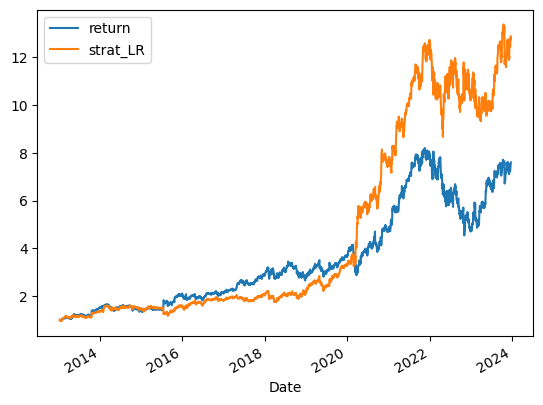

In [27]:
np.exp(data[['return','strat_LR']].cumsum()).plot()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train,test = train_test_split(data, shuffle=False,
                              test_size=0.3, random_state=0)

In [30]:
train = train.copy()

In [31]:
test = test.copy()

In [33]:
model = LinearRegression()

In [34]:
train

,Open,High,Low,Close,Adj Close,Volume,return,returns,lag_1,lag_2,lag_3,lag_4,lag_5,prediction_LR,direction_LR,start_LR,strat_LR
Date,,,,,,,,,,,,,,,,,
2013-01-10,18.501402,18.555450,18.269024,18.467777,18.467777,73703226,0.004542,0.004542,0.006552,-0.001975,-0.004373,0.019568,0.000581,0.000120,1,0.004542,0.004542
2013-01-11,18.480730,18.491440,18.338762,18.430668,18.430668,51600690,-0.002011,-0.002011,0.004542,0.006552,-0.001975,-0.004373,0.019568,0.000388,1,-0.002011,-0.002011
2013-01-14,18.356195,18.485710,17.991314,18.013729,18.013729,114985384,-0.022882,-0.022882,-0.002011,0.004542,0.006552,-0.001975,-0.004373,0.000857,1,-0.022882,-0.022882
2013-01-15,17.916096,18.306383,17.736021,18.055573,18.055573,157696879,0.002320,0.002320,-0.022882,-0.002011,0.004542,0.006552,-0.001975,0.001746,1,0.002320,0.002320
2013-01-16,17.992559,18.040878,17.775124,17.812983,17.812983,81239368,-0.013527,-0.013527,0.002320,-0.022882,-0.002011,0.004542,0.006552,0.000770,1,-0.013527,-0.013527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,81.831497,83.286499,81.611000,83.035500,83.035500,36506000,0.016104,0.016104,-0.006240,0.006149,-0.010984,0.027089,0.012527,0.000439,1,0.016104,0.016104
2020-09-02,83.688751,86.658997,83.316498,86.414001,86.414001,50224000,0.039881,0.039881,0.016104,-0.006240,0.006149,-0.010984,0.027089,-0.000167,-1,-0.039881,-0.039881
2020-09-03,85.485703,85.485703,80.752998,82.092003,82.092003,62156000,-0.051309,-0.051309,0.039881,0.016104,-0.006240,0.006149,-0.010984,-0.001163,-1,0.051309,0.051309


In [35]:
test

,Open,High,Low,Close,Adj Close,Volume,return,returns,lag_1,lag_2,lag_3,lag_4,lag_5,prediction_LR,direction_LR,start_LR,strat_LR
Date,,,,,,,,,,,,,,,,,
2020-09-09,77.876503,78.449997,76.802551,77.848000,77.848000,35494000,0.015907,0.015907,-0.037559,-0.031430,-0.051309,0.039881,0.016104,0.002809,1,0.015907,0.015907
2020-09-10,78.031998,79.204048,76.290253,76.600998,76.600998,32372000,-0.016148,-0.016148,0.015907,-0.037559,-0.031430,-0.051309,0.039881,0.001719,1,-0.016148,-0.016148
2020-09-11,76.800003,78.760002,74.867996,76.036003,76.036003,31942000,-0.007403,-0.007403,-0.016148,0.015907,-0.037559,-0.031430,-0.051309,0.003759,1,-0.007403,-0.007403
2020-09-14,76.950249,78.199997,75.787003,75.963997,75.963997,33932000,-0.000947,-0.000947,-0.007403,-0.016148,0.015907,-0.037559,-0.031430,0.002418,1,-0.000947,-0.000947
2020-09-15,76.800003,77.978500,76.591751,77.071999,77.071999,26622000,0.014481,0.014481,-0.000947,-0.007403,-0.016148,0.015907,-0.037559,0.001442,1,0.014481,0.014481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100,-0.005764,-0.005764,0.002466,-0.007900,-0.014300,-0.013160,0.052035,0.000616,1,-0.005764,-0.005764
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400,0.004793,0.004793,-0.005764,0.002466,-0.007900,-0.014300,-0.013160,0.001790,1,0.004793,0.004793
2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800,0.024722,0.024722,0.004793,-0.005764,0.002466,-0.007900,-0.014300,0.001002,1,0.024722,0.024722


In [36]:
model.fit(train[lagnames], train['return'])

LinearRegression()

In [37]:
test['prediction_LR'] = model.predict(test[lagnames])

In [38]:
test['direction_LR'] = [ 1 if i > 0 else -1 for i in test.prediction_LR]

In [39]:
test['start_LR'] = test['direction_LR'] * test['return']

In [41]:
np.exp(test[['return','strat_LR']].sum())

return      1.822774
strat_LR    2.099803
dtype: float64

<Axes: xlabel='Date'>

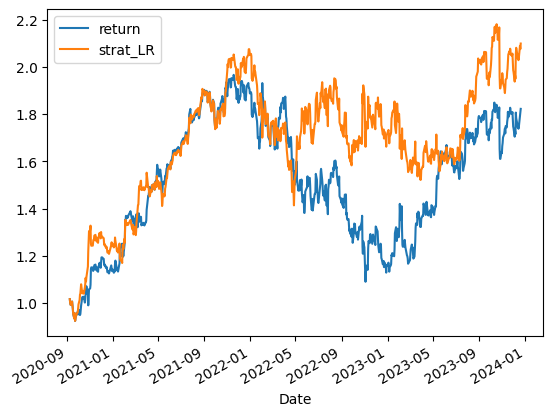

In [42]:
np.exp(test[['return','strat_LR']].cumsum()).plot()

In [45]:
(test['direction_LR'].diff() != 0).value_counts()

direction_LR
False    488
True     339
Name: count, dtype: int64

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Convert predictions to binary (0 or 1)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1_score = fbeta_score(y_test, y_pred_binary, beta=2)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1_score * 100)

Accuracy: 85.5
Precision: 92.3913043478261
Recall: 79.43925233644859
F1 Score: 81.73076923076923
